# Øving 7

# Exercise 7

* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).
* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).
* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

In [1]:
import pandas as pd

data = pd.read_csv('../oving6/agaricus-lepiota.csv')
data = pd.get_dummies(data)
#X = data.copy()
#X = pd.get_dummies(X)
#y = X.pop('edibility_e')
#y = pd.get_dummies(y)

FileNotFoundError: [Errno 2] No such file or directory: &#39;./agaricus-lepiota.csv&#39;

In [3]:
from sklearn.datasets import load_digits

#digits = load_digits()
#digits.data.shape
data.shape

(8124, 119)

In [30]:
from sklearn.cluster import KMeans

k=9
kmeans = KMeans(n_clusters=k, random_state=0)
#clusters = kmeans.fit_predict(digits.data)
clusters = kmeans.fit_predict(data)
kmeans.cluster_centers_.shape

(9, 119)

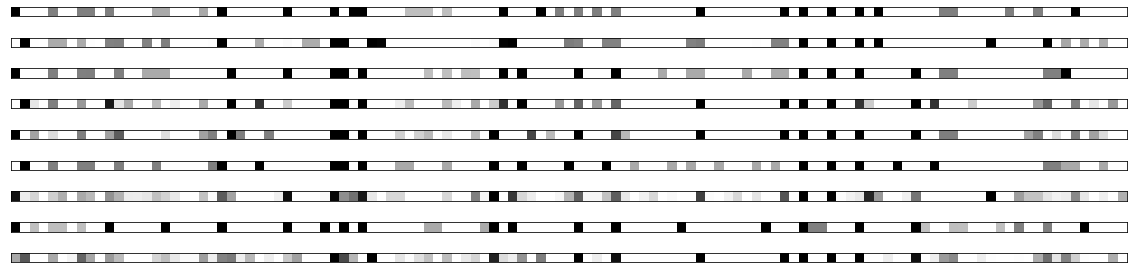

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(k, 1, figsize=(20, 5))
#centers = kmeans.cluster_centers_.reshape(10, 8, 8)
centers = kmeans.cluster_centers_.reshape(k, 1, 119)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

2: 0.180325
3: 0.228323
4: 0.230086
5: 0.260212
6: 0.277143
7: 0.290557
8: 0.300959
9: 0.309081
10: 0.248743
11: 0.195463
12: 0.210329
13: 0.205223
14: 0.216600
15: 0.166459
16: 0.187682
done in 78.881s


(-0.05, 1.05)

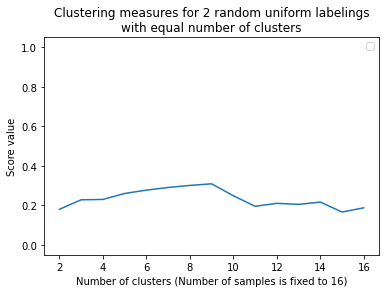

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn import metrics

def uniform_labelings_scores(n_samples, n_clusters_range,
                             fixed_n_classes=None, n_runs=5, seed=42):
    """Compute score for 2 random uniform cluster labelings.

    Both random labelings have the same number of clusters for each value
    possible value in ``n_clusters_range``.

    When fixed_n_classes is not None the first labeling is considered a ground
    truth class assignment with fixed number of classes.
    """
    
    random_labels = np.random.RandomState(seed).randint
    scores = np.zeros((len(n_clusters_range), n_runs))

    for i, k in enumerate(n_clusters_range):
        #for j in range(n_runs):
        #    if fixed_n_classes is None:
        #        labels_a = random_labels(low=0, high=k, size=n_samples)
        #    labels_b = random_labels(low=0, high=k, size=n_samples)
        #    scores[i, j] = score_func(labels_a, labels_b)
        km = KMeans(n_clusters=k)
        km = km.fit(data)
        labels = km.labels_
        silscore = metrics.silhouette_score(data, labels, metric='euclidean')
        #scores[i] = km.inertia_
        scores[i] = silscore
        print("%i: %f"%(k,silscore))
    
    return scores

    


def ami_score(U, V):
    return metrics.adjusted_mutual_info_score(U, V)

score_funcs = [
    metrics.adjusted_rand_score,
    metrics.v_measure_score,
    ami_score,
    metrics.mutual_info_score,
]

# 2 independent random clusterings with equal cluster number

n_samples = 16
samples_divisor = 15
n_clusters_range = np.linspace(2, n_samples, samples_divisor).astype(np.int)

plt.figure(1)

plots = []
names = []
#for score_func in score_funcs:
    #print("Computing %s for %d values of n_clusters and n_samples=%d"
    #      % (score_func.__name__, len(n_clusters_range), n_samples))

t0 = time()
scores = uniform_labelings_scores(n_samples, n_clusters_range)
print("done in %0.3fs" % (time() - t0))
plots.append(plt.errorbar(
    n_clusters_range, np.median(scores, axis=1), scores.std(axis=1))[0])
plt.title("Clustering measures for 2 random uniform labelings\n"
          "with equal number of clusters")
plt.xlabel('Number of clusters (Number of samples is fixed to %d)' % n_samples)
plt.ylabel('Score value')
plt.legend(plots, names)
plt.ylim(bottom=-0.05, top=1.05)



In [10]:
K = range(2,16)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    labels = km.labels_
    silscore = metrics.silhouette_score(data, labels, metric='euclidean')
    print("%i: %f, %f"%(k,km.inertia_,silscore))
    

2: 79831.624122, 0.180325
3: 67842.898153, 0.228323
4: 59941.475879, 0.230086
5: 54420.284288, 0.260212
6: 50678.776815, 0.277143
7: 47989.422585, 0.287512
8: 45873.280841, 0.300959
9: 43967.059250, 0.307173
10: 42425.169480, 0.313934
11: 42446.707486, 0.200610
12: 41336.678104, 0.201447
13: 40946.062352, 0.155431
14: 38866.418374, 0.217227
15: 38049.561259, 0.174009
16: 38058.531214, 0.163297
17: 37489.823515, 0.168084
18: 37288.304582, 0.160333
19: 36212.368031, 0.146763
20: 35601.632797, 0.167479
21: 34976.669861, 0.178793
22: 34756.387013, 0.147819
23: 34390.603229, 0.174158
24: 33720.795532, 0.148011
25: 33688.161924, 0.144501
26: 33043.046515, 0.159730
27: 32612.185651, 0.158395
28: 32290.638544, 0.148146
29: 31831.849525, 0.163852


0.1638522041873227